In [5]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import  Dropout
import cv2
import matplotlib.pyplot as plt

**CHECKING IMAGES FOR CONFIRMATION**

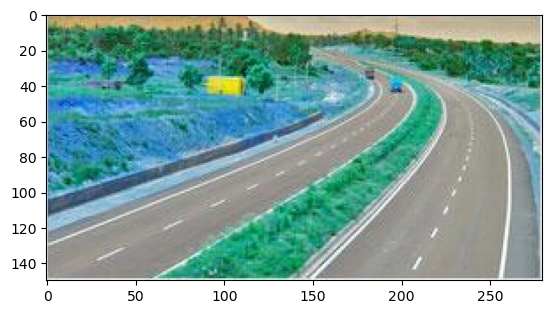

In [2]:
plt.imshow(cv2.imread(r"D:\Python\Pothole detection\normal\1.jpg"))

**Part 1 - Data Preprocessing**

****Splitting dataset into training and validation and preprocessing the training set****

In [14]:
train_data_dir = "D:/Python/Pothole detection train"  
validation_data_dir = "D:/Python/validation"  

# img_width, img_height = 224, 224  
def create_datagen(img_width, img_height):
    train_datagen = ImageDataGenerator(
        rescale=1./255,  
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )
    validation_datagen = ImageDataGenerator(rescale=1./255)  

    train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,  
        class_mode='binary',
        subset='training'  
    )
    validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,  
        class_mode='binary' 
    )


In [15]:
create_datagen(64,64)

Found 653 images belonging to 2 classes.
Found 28 images belonging to 2 classes.


**Initialising the CNN**

In [53]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**Compiling the CNN**

In [54]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Training the CNN on the Training set and evaluating it on the Validation set**

In [9]:
history=model.fit(x = train_generator, validation_data = validation_generator, epochs = 25)

Epoch 1/25


18/18 [==============================] - 56s 3s/step - loss: 0.7346 - accuracy: 0.5256 - val_loss: 0.6854 - val_accuracy: 0.5037
Epoch 2/25
18/18 [==============================] - 38s 2s/step - loss: 0.6616 - accuracy: 0.6190 - val_loss: 0.5904 - val_accuracy: 0.7556
Epoch 3/25
18/18 [==============================] - 39s 2s/step - loss: 0.5962 - accuracy: 0.7070 - val_loss: 0.4913 - val_accuracy: 0.8000
Epoch 4/25
18/18 [==============================] - 38s 2s/step - loss: 0.4222 - accuracy: 0.8315 - val_loss: 0.4473 - val_accuracy: 0.7556
Epoch 5/25
18/18 [==============================] - 34s 2s/step - loss: 0.3481 - accuracy: 0.8553 - val_loss: 0.4633 - val_accuracy: 0.7630
Epoch 6/25
18/18 [==============================] - 32s 2s/step - loss: 0.3243 - accuracy: 0.8498 - val_loss: 0.4946 - val_accuracy: 0.7556
Epoch 7/25
18/18 [==============================] - 32s 2s/step - loss: 0.2890 - accuracy: 0.8663 - val_loss: 0.4270 - val_accuracy: 0.8148
Epoch 8/25
18/18 [

In [10]:
# cnn.save("cnn.h5")

C:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


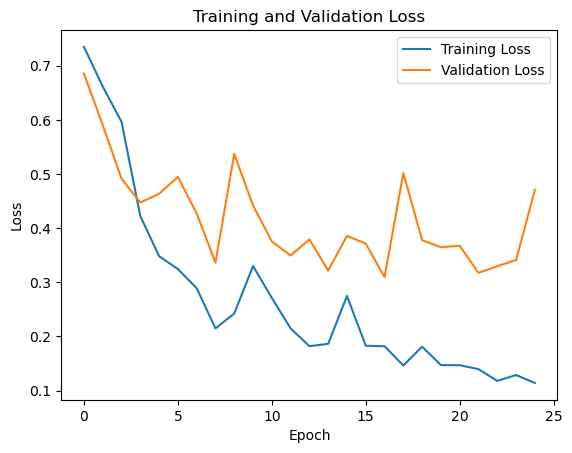

In [37]:
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [38]:
history = cnn.history
history=history.history

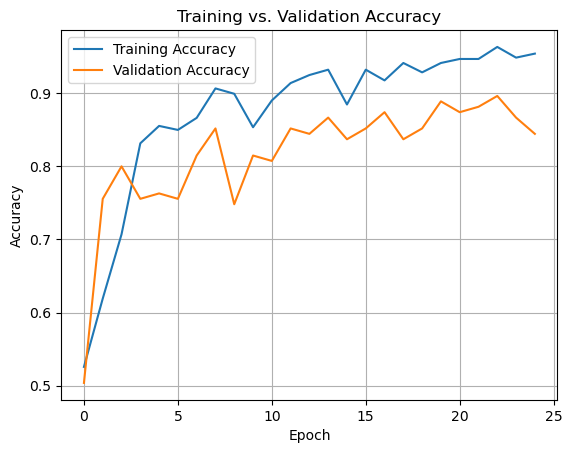

In [40]:

train_acc = history['accuracy']
val_acc = history['val_accuracy']
train_loss = history['loss']
val_loss = history['val_loss']

# Plot accuracy
plt.plot(range(len(train_acc)), train_acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Part 4 - Making a single prediction**

1/1 [==============================] - 0s 63ms/step
normal


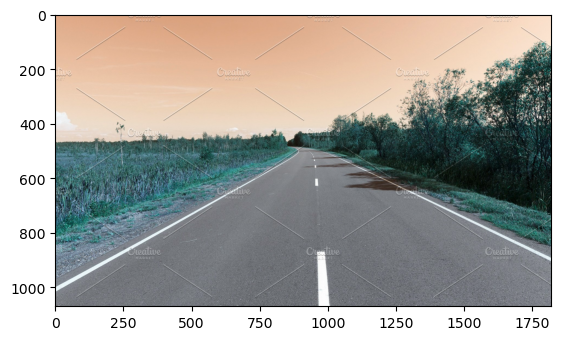

In [18]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r"D:\Python\Pothole detection\normal\20.jpg", target_size = (64, 64))
plt.imshow(cv2.imread(r"D:\Python\Pothole detection\normal\20.jpg"))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
# training_set.class_indices
if result[0][0] == 1:
    prediction = 'pothole'
else:
    prediction = 'normal'


print(prediction)

In [ ]:
plt.imshow(cv2.imread("D:/Python/Pothole detection/potholes/123.jpg"))
print(prediction)

### VGG16 model

In [16]:
create_datagen(224, 224)

Found 653 images belonging to 2 classes.
Found 28 images belonging to 2 classes.


In [17]:
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

for layer in vgg.layers:
    layer.trainable = False

x = vgg.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x) 
x = Dropout(0.5)(x)  
output = Dense(1, activation='sigmoid')(x)  

In [18]:
model = Model(inputs=base_model.input, outputs=output)

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [4]:
history=model.fit(train_generator,
          epochs=5, 
          validation_data=validation_generator)




Epoch 1/5


21/21 [==============================] - 161s 7s/step - loss: 1.0729 - accuracy: 0.8208 - val_loss: 0.7760 - val_accuracy: 0.8929
Epoch 2/5
21/21 [==============================] - 154s 7s/step - loss: 0.3592 - accuracy: 0.9311 - val_loss: 0.0803 - val_accuracy: 0.9643
Epoch 3/5
21/21 [==============================] - 153s 7s/step - loss: 0.1444 - accuracy: 0.9617 - val_loss: 0.1627 - val_accuracy: 0.9643
Epoch 4/5
21/21 [==============================] - 147s 7s/step - loss: 0.0960 - accuracy: 0.9724 - val_loss: 0.1293 - val_accuracy: 0.9643
Epoch 5/5
21/21 [==============================] - 111s 5s/step - loss: 0.0720 - accuracy: 0.9755 - val_loss: 0.2402 - val_accuracy: 0.9286


In [5]:
# model.save("vgg16_model.h5")

C:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 405ms/step
pothole


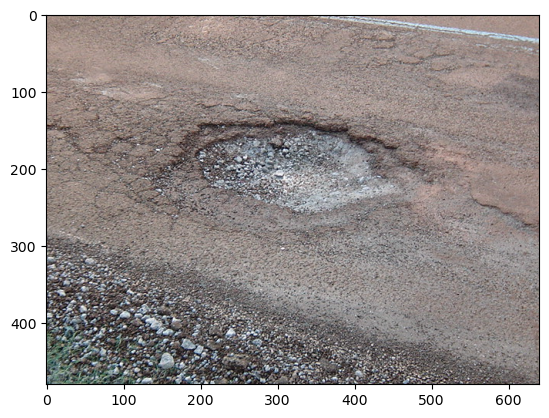

In [12]:
test_image = image.load_img("D:/Python/Pothole detection/potholes/123.jpg", target_size = (224, 224))
plt.imshow(cv2.imread("D:/Python/Pothole detection/potholes/123.jpg"))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
# training_set.class_indices
if result[0][0] == 1:
    prediction = 'pothole'
else:
    prediction = 'normal'


print(prediction)

In [11]:
model1= tf.keras.models.load_model("vgg16_model.h5") 

In [20]:
history=history.history

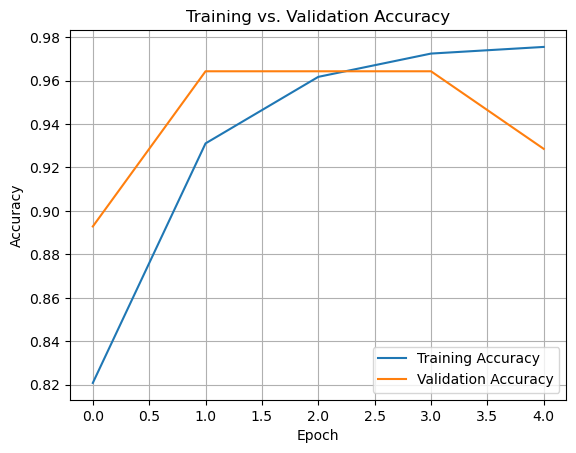

In [21]:
train_acc = history['accuracy']
val_acc = history['val_accuracy']
train_loss = history['loss']
val_loss = history['val_loss']

# Plot accuracy
plt.plot(range(len(train_acc)), train_acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

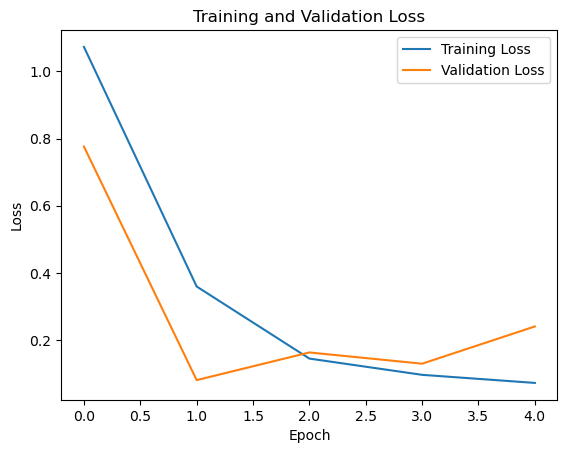

In [22]:
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [46]:
def load_images_from_folder(folder):
    global images
    global labels
    images = []
    labels = []
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        for filename in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (100, 100))  # Resize image to a consistent size
                images.append(img.flatten())  # Convert image to 1D array
                labels.append(subfolder)  # Label based on folder name
    replacement_map = {"normal": 0, "potholes": 1}
    labels = [replacement_map[i] for i in labels]
    return np.array(images), np.array(labels)

train_folder = "D:/Python/Pothole detection train"
val_folder = "D:/Python/validation"


X_train, y_train = load_images_from_folder(train_folder)
X_val, y_val = load_images_from_folder(val_folder)

### Random Forest

In [47]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred_rf = clf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.8214285714285714


### XGboost

In [35]:
%%time
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(n_estimators=100,learning_rate=0.1)  # Unpack dictionary into arguments

xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_xgb)
print("Accuracy:", accuracy)

Accuracy: 0.7857142857142857
CPU times: total: 20min 26s
Wall time: 4min 31s


### LogisticRegression

In [29]:
from sklearn.linear_model import LogisticRegression

logreg_clf = LogisticRegression() 

logreg_clf.fit(X_train, y_train)

y_pred_logreg = logreg_clf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_logreg)
print("Accuracy:", accuracy)

Accuracy: 0.75


### -------------------------------------------------------------------------

### Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()

nb_clf.fit(X_train, y_train)

y_pred_nb = nb_clf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_nb)
print("Accuracy:", accuracy)

Accuracy: 0.75


### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)

tree_clf.fit(X_train, y_train)

y_pred_dt = tree_clf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_dt)
print("Accuracy:", accuracy)

Accuracy: 0.7142857142857143


### KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5,metric='euclidean')  # Unpack dictionary into arguments

knn_clf.fit(X_train, y_train)

y_pred = knn_clf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5714285714285714


### Accuracy scores

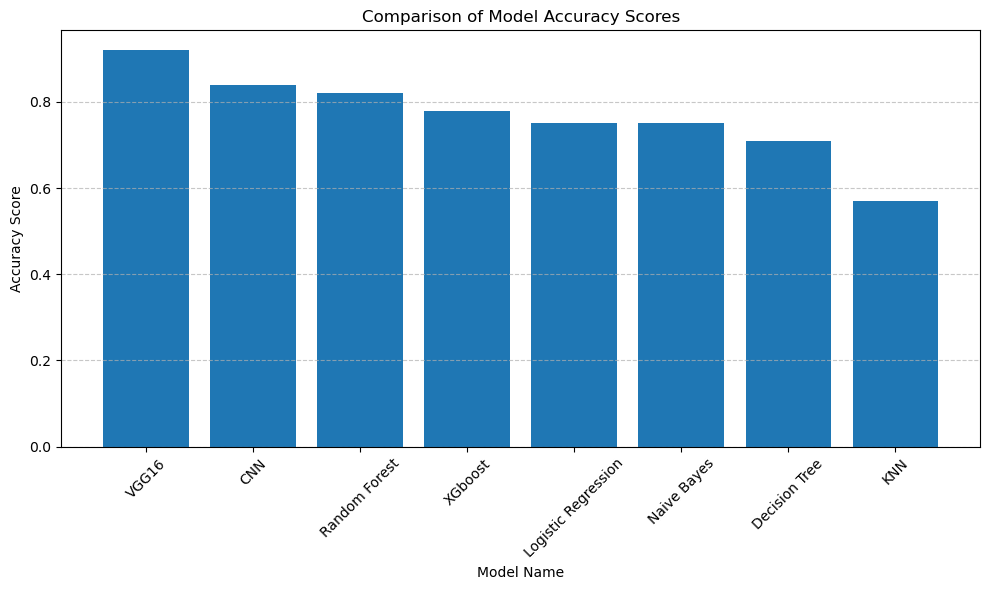

In [43]:
model_names = ["VGG16", "CNN", "Random Forest", "XGboost", "Logistic Regression", "Naive Bayes", "Decision Tree", "KNN"]
accuracy_scores = [0.92, 0.84, 0.82, 0.78, 0.75, 0.75, 0.71,0.57]

plt.figure(figsize=(10, 6)) 
plt.bar(model_names, accuracy_scores)
plt.xlabel("Model Name")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Model Accuracy Scores")

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Predicting using machine learning model

In [22]:

def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (100, 100))  
    img_vector = img.flatten()  
    return img_vector

def predict_single_image(img_path, clf):
    global prediction
    img_vector = preprocess_image(img_path)
    prediction = clf.predict([img_vector])  
    return prediction[0]
single_image_path = "D:/Python/validation/normal/15.jpg"

# Get prediction for the single image
predictions = predict_single_image(single_image_path, clf)
print("Prediction:", predictions)
if predictions==0:
    print("Normal")
else:
    print("Pothole")

Prediction: 0
Normal


In [48]:
prediction

array([0])